In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pickle

# load the Boston housing dataset
boston_housing = datasets.load_boston()

# create pandas dataframe
df = pd.DataFrame(boston_housing.data)
df.columns = boston_housing.feature_names
df['PRICE'] = boston_housing.target
print (df.columns)
print (df.head())
# we'll only use AGE to predict PRICE
df = df[['AGE','PRICE']]

# take a peek at dataset
df.head()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


,AGE,PRICE
0,65.2,24.0
1,78.9,21.6
2,61.1,34.7
3,45.8,33.4
4,54.2,36.2


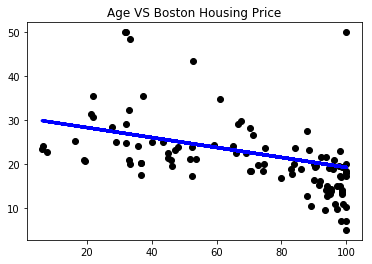

In [5]:
# splitting into test/train sets
X_train, X_test, y_train, y_test = train_test_split(
    df['AGE'], df['PRICE'], test_size=0.2, random_state=42
)

# create linear regression object and train
model = linear_model.LinearRegression()
model.fit(X_train.to_frame(), y_train.to_frame())

# make predictions using the testing set
y_pred = model.predict(X_test.to_frame())

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Age VS Boston Housing Price')
plt.show()

In [6]:
# Use pickle to serialize and save model for later use
with open('house_price_model', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)